In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
file = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
file.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
for i in file.columns:
    print( i+" \t: " +str(file[i].isnull().sum()))

Id 	: 0
MSSubClass 	: 0
MSZoning 	: 0
LotFrontage 	: 259
LotArea 	: 0
Street 	: 0
Alley 	: 1369
LotShape 	: 0
LandContour 	: 0
Utilities 	: 0
LotConfig 	: 0
LandSlope 	: 0
Neighborhood 	: 0
Condition1 	: 0
Condition2 	: 0
BldgType 	: 0
HouseStyle 	: 0
OverallQual 	: 0
OverallCond 	: 0
YearBuilt 	: 0
YearRemodAdd 	: 0
RoofStyle 	: 0
RoofMatl 	: 0
Exterior1st 	: 0
Exterior2nd 	: 0
MasVnrType 	: 8
MasVnrArea 	: 8
ExterQual 	: 0
ExterCond 	: 0
Foundation 	: 0
BsmtQual 	: 37
BsmtCond 	: 37
BsmtExposure 	: 38
BsmtFinType1 	: 37
BsmtFinSF1 	: 0
BsmtFinType2 	: 38
BsmtFinSF2 	: 0
BsmtUnfSF 	: 0
TotalBsmtSF 	: 0
Heating 	: 0
HeatingQC 	: 0
CentralAir 	: 0
Electrical 	: 1
1stFlrSF 	: 0
2ndFlrSF 	: 0
LowQualFinSF 	: 0
GrLivArea 	: 0
BsmtFullBath 	: 0
BsmtHalfBath 	: 0
FullBath 	: 0
HalfBath 	: 0
BedroomAbvGr 	: 0
KitchenAbvGr 	: 0
KitchenQual 	: 0
TotRmsAbvGrd 	: 0
Functional 	: 0
Fireplaces 	: 0
FireplaceQu 	: 690
GarageType 	: 81
GarageYrBlt 	: 81
GarageFinish 	: 81
GarageCars 	: 0
GarageArea 	

In [19]:
dic = {'LotFrontage':file['LotFrontage'].median,'Alley' : 'NA','BsmtQual':'NA','BsmtCond':'NA', 'BsmtExposure':'NA', 'BsmtFinType1':'NA',
       'BsmtFinType2':'NA','FireplaceQu':'NA','GarageYrBlt':file['GarageYrBlt'].mean,'GarageFinish':'NA', 'GarageQual':'NA','GarageType':'NA',
       'GarageCond':'NA','PoolQC':'NA','Fence':'NA', 'MiscFeature':'NA','MasVnrType':file['MasVnrType'].value_counts().idxmax(),'MasVnrArea':0,
       'Electrical': file['Electrical'].value_counts().idxmax()}
for i in dic:
    file[i] = file[i].fillna(dic[i])

In [20]:
print('Total no. of null values now are : '+ str(file[i].isnull().sum().sum()))

Total no. of null values now are : 0


In [21]:
file

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


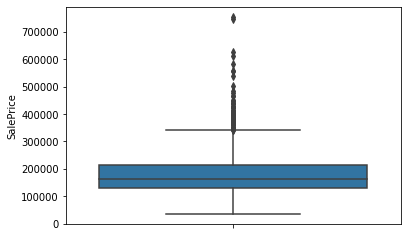

In [22]:
sns.boxplot( y = 'SalePrice',data = file)

In [23]:
removed = 0
for i in file.index:
    if file['SalePrice'][i]>450000:
        file = file.drop(i)
        removed+=1
print(removed)

14


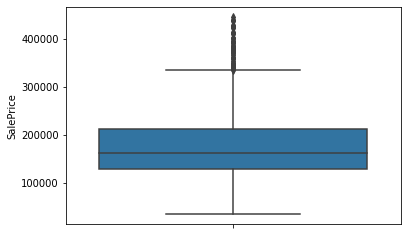

In [24]:
sns.boxplot( y = 'SalePrice',data = file)

In [25]:
file.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
list_cat = ['MSSubClass','MSZoning','Street','Alley', 'LotShape', 'LandContour','Utilities', 'LotConfig','LandSlope', 'Neighborhood','Condition1', 
            'Condition2','BldgType','HouseStyle', 'OverallQual','OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType',
            'ExterQual','ExterCond', 'Foundation', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 
            'CentralAir', 'Electrical','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr','KitchenQual',
            'TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars', 'GarageQual','GarageCond', 
            'PavedDrive','PoolQC','Fence', 'MiscFeature','SaleType','SaleCondition']
list_cont = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 
             'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold',]
print('No. of columns with categorical data values are : '+str(len(list_cat)))
print('No. of columns with continuous data values are : '+str(len(list_cont)))

No. of columns with categorical data values are : 55
No. of columns with continuous data values are : 24


In [29]:
dic = {}
for i in list_cat :
    a = []
    for j in file.groupby(i).mean().index:
        a.append(j)
    dic[i] = a
dic['Alley'] = ['Grvl','Pave','NA']
dic['LandContour'] = ['Lvl','Bnk', 'HLS', 'Low']
dic['LotConfig'] = ['Inside','Corner', 'CulDSac', 'FR2', 'FR3']
dic['ExterQual'] = ['Ex', 'Gd', 'TA', 'Fa']
dic['ExterCond'] = ['Ex','Gd', 'TA','Fa','Po']
dic['BsmtQual'] = ['Ex', 'Gd', 'TA', 'Fa','NA']
dic['BsmtCond'] = ['Gd', 'TA', 'Fa','Po','NA']
dic['BsmtExposure'] = ['Gd','Av', 'Mn', 'No','NA']
dic['BsmtFinType1'] = ['GLQ','ALQ', 'BLQ','Rec', 'LwQ', 'Unf','NA']
dic['BsmtFinType2'] = ['GLQ','ALQ', 'BLQ','Rec', 'LwQ', 'Unf','NA']
dic['HeatingQC'] = ['Ex','Gd', 'TA','Fa','Po']
dic['Electrical'] = ['SBrkr','FuseA', 'FuseF', 'FuseP', 'Mix']
dic['KitchenQual'] = ['Ex','Gd', 'TA','Fa']
dic['Functional']=['Typ','Min1', 'Min2', 'Mod','Maj1', 'Maj2', 'Sev']
dic['FireplaceQu'] = ['Ex','Gd', 'TA','Fa','Po','NA']
dic['GarageQual'] =['Ex','Gd', 'TA','Fa','Po','NA']
dic['GarageCond'] =['Ex','Gd', 'TA','Fa','Po','NA']
dic['GarageFinish'] = ['Fin','RFn','Unf','NA']
dic['PoolQC'] = ['Ex','Gd','Fa','NA']
dic['Fence'] = ['GdPrv','MnPrv','GdWo', 'MnWw','NA']
dic['SaleType'] = ['WD','CWD','New','COD', 'Con','ConLw', 'ConLI','ConLD','Oth', ]
dic['SaleCondition'] = ['Normal','Abnorml', 'AdjLand', 'Alloca', 'Family','Partial']

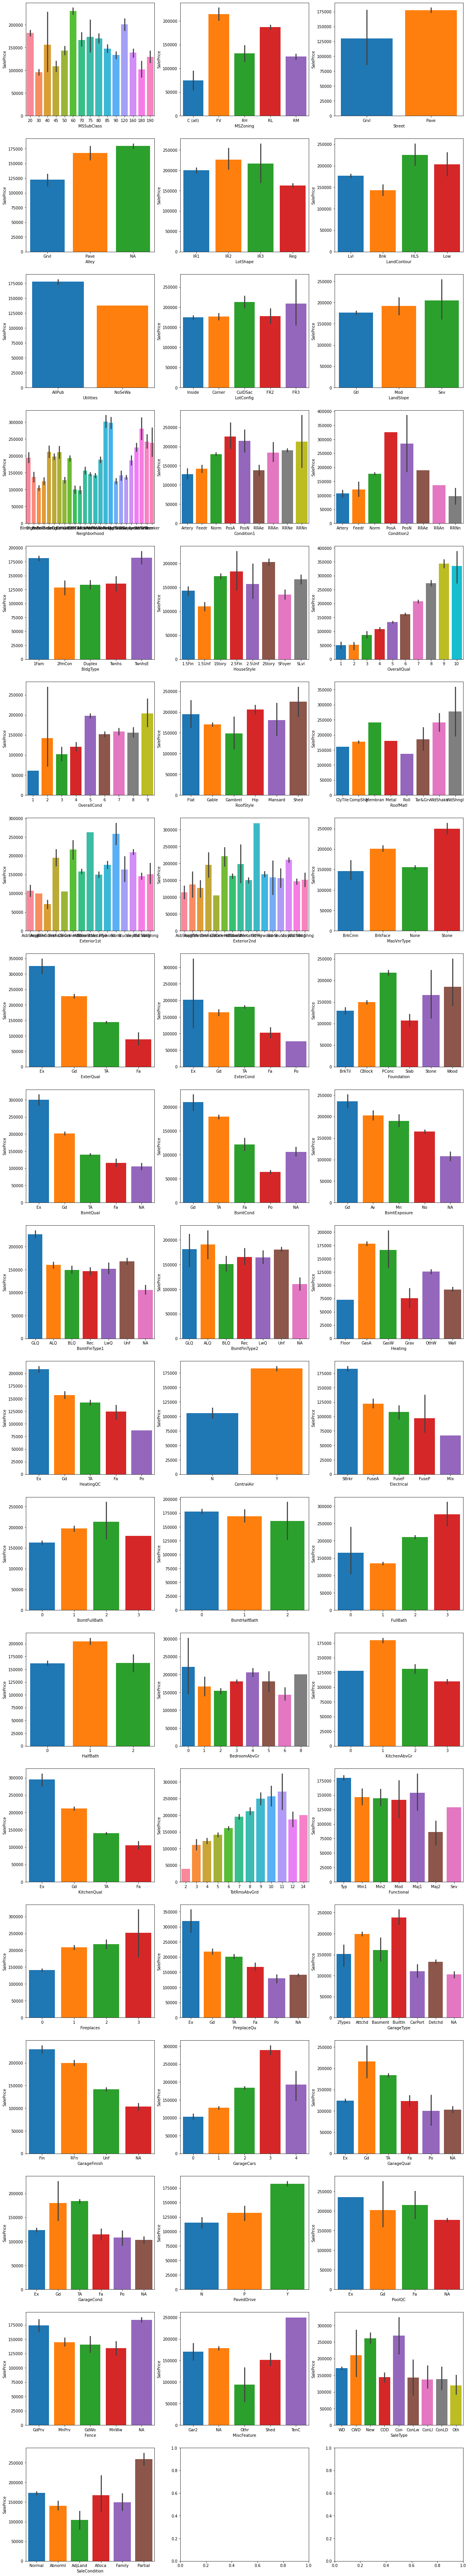

In [30]:
y = 'SalePrice'
n = 3
s= 20
f,axes = plt.subplots(19,n,figsize = (s,6*s))
counter = 0
for i in list_cat:
    sns.barplot(x = i , y = y , data  = file,order= dic[i], ax = axes[counter//n][counter%n],saturation = 1)
    counter+=1

In [ ]:
#List of features on which to apply one hot encoding before applying regression:
list_pure_categorical = ['MSSubClass','MSZoning','LotShape','LandContour', 'LotConfig', 'Neighborhood','Condition1', 'Condition2', 'BldgType',
                        'HouseStyle','RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd' 'Foundation','Heating','GarageType''SaleType',
                         'SaleCondition','MiscFeature','MasVnrType']

categorical_ordered = ['Street','Alley','Utilities','LandSlope','OverallQual', 'OverallCond','ExterQual', 'ExterCond','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC', 'CentralAir','Electrical','KitchenQual','BsmtFullBath', 
                       'BsmtHalfBath', 'FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Functional','Fireplaces',
                       'FireplaceQu','GarageFinish', 'GarageCars','GarageQual','GarageCond', 'PavedDrive','PoolQC','Fence']

In [ ]:
list_cont = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF',
               '1stFlrSF','GarageYrBlt', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold','LowQualFinSF', 'GrLivArea','2ndFlrSF']

,'TotRmsAbvGrd','Fireplaces','GarageCars', 'BsmtFullBath','BedroomAbvGr', 'KitchenAbvGr','BsmtHalfBath', 'FullBath','HalfBath'

In [ ]:
len(list_cont)

In [ ]:
n = 3
s= 20
f,axes = plt.subplots(3*n-1,n,figsize = (s,3*s))
counter = 0
for i in list_cont:
    sns.boxplot(y = i , data  = file, ax = axes[counter//n][counter%n])
    counter+=1

In [ ]:
outlier ={'LotFrontage':150, 'LotArea':100000,'MasVnrArea':900,'BsmtFinSF1':2000,'TotalBsmtSF':2500,
               '1stFlrSF':2500, 'GarageArea':1130,'WoodDeckSF':600, 'OpenPorchSF':310,
               'EnclosedPorch':310,'3SsnPorch':350,'MiscVal':6000,'GrLivArea':3500, 'BsmtFullBath':2.5,'2ndFlrSF':1750}
for j in outlier:
    for i in file.index:
        if file[j][i]>outlier[j]:
            file = file.drop(i)
            removed+=1
    print(j + ' : '+ str(removed))
for i in file.index:
    if file['YearBuilt'][i]<1880:
        file = file.drop(i)
        removed+=1
print('YearBuilt' + ' : '+ str(removed))

,'BsmtFullBath','TotRmsAbvGrd','Fireplaces','GarageCars'

In [ ]:
y = 'SalePrice'
n = 3
s= 20
f,axes = plt.subplots(4*n,n,figsize = (s,4*s),sharey=True)
counter = 0
for i in list_cont:
    sns.lineplot(x = i , y = y , data  = file, ax = axes[counter//n][counter%n])
    counter+=1

In [ ]:
file.columns

In [ ]:
corr  = file[[ 'LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF',
               '1stFlrSF','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
               'BsmtHalfBath', 'FullBath','HalfBath','2ndFlrSF','SalePrice']].corr()
f,axes = plt.subplots(1,1,figsize = (25,25))
sns.heatmap(corr,square=True,annot = True,linewidth = .1,linecolor = 'black',ax = axes,center = 1.4)

In [ ]:
file.columns